<a href="https://colab.research.google.com/github/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/importing-data-from-tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data From Tables
Kozo Nishida and Barry Demchak

2021-11-16

Cytoscape supports the ability to link data to networks as node and edge attributes, enabling data-driven network visualization. This tutorial describes how to load expression data from a spreadsheet, and how to link it to already loaded networks.

## Installation

First, launch [Cytoscape Desktop](https://cytoscape.org/) and install the [FileTransfer App](http://apps.cytoscape.org/apps/filetransfer).

Then run the following chunk of code below to install the py4cytoscape module.

In [1]:
%%capture
!python3 -m pip install python-igraph requests pandas networkx
!python3 -m pip install py4cytoscape

If you are using a remote notebook environment such as Google Colab, please execute the cell below. (If you're running on your local notebook, you don't need to do that.)



In [2]:
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


Loading Javascript client ... 71e1e987-f1c0-49d9-9273-61760ce0c366 on https://jupyter-bridge.cytoscape.org


<IPython.core.display.Javascript object>

In [3]:
import IPython
import py4cytoscape as p4c

In [4]:
p4c.cytoscape_version_info()

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.9.0',
 'automationAPIVersion': '1.2.0',
 'py4cytoscapeVersion': '0.0.10'}

In [5]:
p4c.sandbox_get_file_info('.')

{'filePath': '/Users/yxin/CytoscapeConfiguration/filetransfer/default_sandbox',
 'modifiedTime': '2021-11-16 16:37:47.0478',
 'isFile': False}

## Loading Network

*   Import **galFiltered network**.

In [6]:
!wget https://raw.githubusercontent.com/cytoscape/RCy3/master/inst/extdata/galFiltered.sif

--2021-11-16 16:37:47--  https://raw.githubusercontent.com/cytoscape/RCy3/master/inst/extdata/galFiltered.sif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6822 (6.7K) [text/plain]
Saving to: ‘galFiltered.sif.1’

galFiltered.sif.1   100%[===================>]   6.66K  --.-KB/s    in 0.001s  

2021-11-16 16:37:48 (9.70 MB/s) - ‘galFiltered.sif.1’ saved [6822/6822]



In [7]:
!head galFiltered.sif

YKR026C pp YGL122C
YGR218W pp YGL097W
YGL097W pp YOR204W
YLR249W pp YPR080W
YLR249W pp YBR118W
YLR293C pp YGL097W
YMR146C pp YDR429C
YDR429C pp YFL017C
YPR080W pp YAL003W
YBR118W pp YAL003W


In [8]:
p4c.sandbox_send_to("galFiltered.sif")

{'filePath': '/Users/yxin/CytoscapeConfiguration/filetransfer/default_sandbox/galFiltered.sif'}

In [9]:
p4c.import_network_from_file("galFiltered.sif")

{'networks': [61934], 'views': [64044]}


*   When the network first opens, the entire network may not visible because of the default zoom factor used. To see the whole network,


In [10]:
p4c.fit_content()

{}


*   By default, the "Prefuse Force Directed Layout" is applied to organize the layout of the nodes. The default layout can be changed


In [11]:
p4c.get_layout_names()

['attribute-circle',
 'stacked-node-layout',
 'attribute-grid',
 'degree-circle',
 'circular',
 'attributes-layout',
 'kamada-kawai',
 'force-directed',
 'cose',
 'grid',
 'hierarchical',
 'fruchterman-rheingold',
 'isom']

In [12]:
p4c.layout_network('cose')

{}

In [13]:
p4c.layout_network('force-directed')

{}

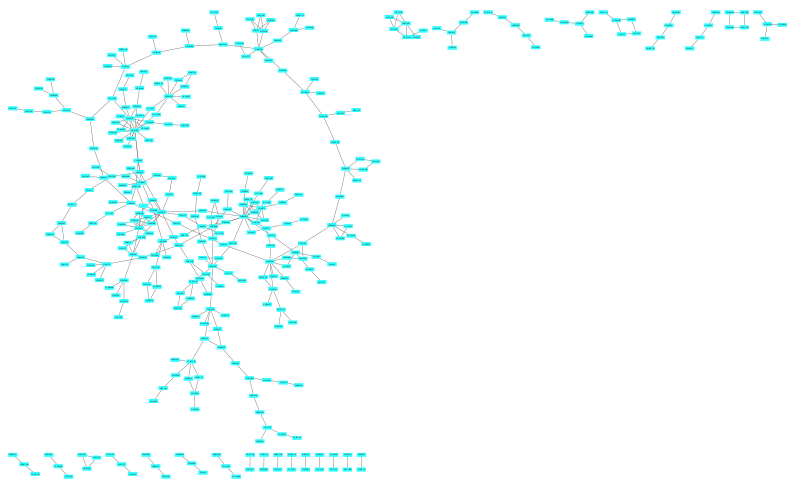

In [14]:
p4c.export_image(filename="galFiltered.png")
p4c.sandbox_get_from("galFiltered.png")
from IPython.display import Image
Image('galFiltered.png')

## Loading Expression Data

The data you are working with is from yeast, the genes **Gal1, Gal4,** and **Gal80** are all yeast transcription factors. Your expression experiments all involve some perturbation of these transcription factor genes.

Gal1, Gal4, and Gal80 are also represented in your interaction network, where they are labeled according to yeast locus tags: **Gal1 corresponds to YBR020W, Gal4 to YPL248C, and Gal80 to YML051W.**

*   Run the following chunk to view the first few lines. This [galExpData.csv](https://cytoscape.github.io/cytoscape-tutorials/protocols/data/galExpData.csv) is also included with your Cytoscape installation directory, under **sampleData**.


In [15]:
import pandas as pd
df=pd.read_csv("https://cytoscape.github.io/cytoscape-tutorials/protocols/data/galExpData.csv")
df.head()

,GENE,COMMON,gal1RGexp,gal4RGexp,gal80Rexp,gal1RGsig,gal4RGsig,gal80Rsig
0,YHR051W,COX6,-0.034,0.111,-0.304,0.375720,0.015624,0.000008
1,YHR124W,NDT80,-0.090,0.007,-0.348,0.271460,0.964330,0.344760
2,YKL181W,PRS1,-0.167,-0.233,0.112,0.006271,0.000789,0.144060
3,YGR072W,UPF3,0.245,-0.471,0.787,0.000410,0.000752,0.000014
4,YHL020C,OPI1,0.174,-0.015,0.151,0.000140,0.719120,0.015395


Note the following information about the file:

*   The first line consists of column labels.
*   All columns are separated by a single comma character.
*   The first column contains node names, and **must match the names of the nodes in your network exactly!**
*   The second column contains common locus names. This column is optional, the data is not used by Cytoscape, but including this column makes the format consistent with the output of many analysis packages, and makes the file easier to read.
*   The remaining columns contain experimental data, two columns per experiment (one for expression measurement and a second for corresponding significance value), and one line per node. In this case, there are three expression results per node.

---



*   Run the following code chunk to load the **galExpData.csv** file
*   You need to set the **Key** column to indicate which column will be used to match with the network key column.


In [16]:
p4c.load_table_data(df, data_key_column="GENE")

/opt/anaconda3/lib/python3.8/site-packages/py4cytoscape/tables.py:474: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


'Success: Data loaded in defaultnode table'

Now you should see expression values listed in new columns in the **Node Table**. The **Table Panel** has the following features:

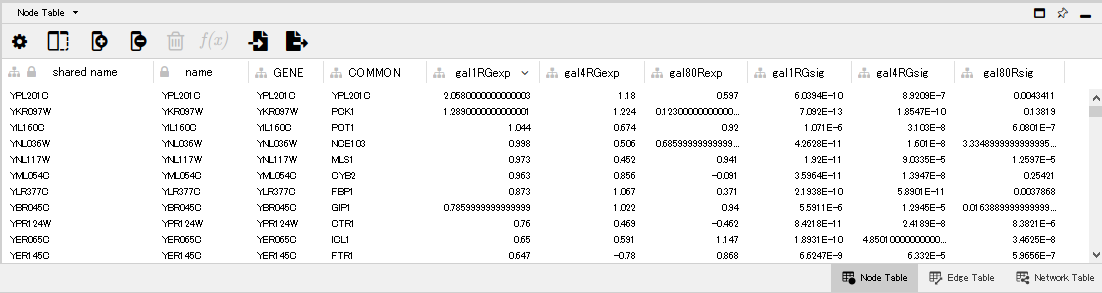


*   Select a node in the network and the table will update to show only the corresponding row.
*   You can limit the columns shown by clicking on the **Show Columns** button 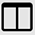  and selecting columns.
